<a href="https://colab.research.google.com/github/uto4ka101/Correlation_PCA/blob/main/handle_Multicollinearity_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("DATA/diamond/diamonds.csv", usecols=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', \
                                                         'x', 'y', 'z'])
print(data.shape)
data.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [ ]:
data["cut"] = data["cut"].replace({"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4})
data["color"] = data["color"].replace({'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6})
data["clarity"] = data["clarity"].replace({'IF':0, 'VVS1':1, 'VVS2':2, 'VS1':3, 'VS2':4, 'SI1':5, 'SI2':6, 'I1':7})

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,6,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
y = data["price"]
X = data.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

### Correlation:

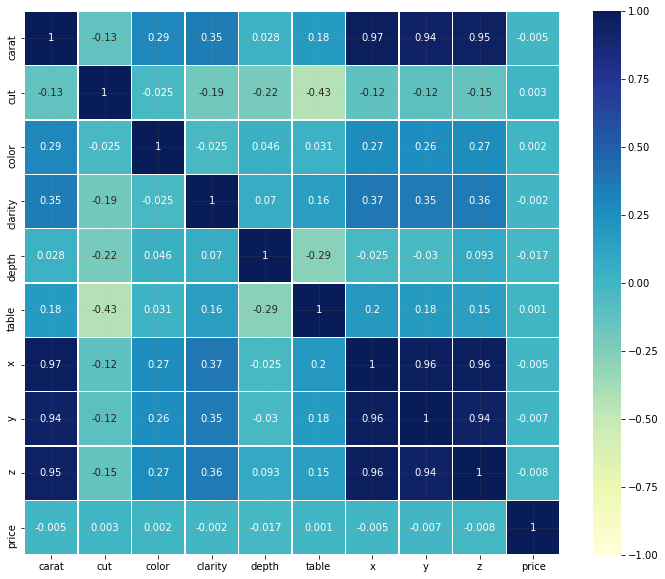

In [ ]:
df_train = pd.DataFrame(X_train_std, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
df_train["price"] = y_train

corr = df_train.corr()
plt.figure(figsize = (12,10))

sns.heatmap(round(corr, 3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

## PCA:

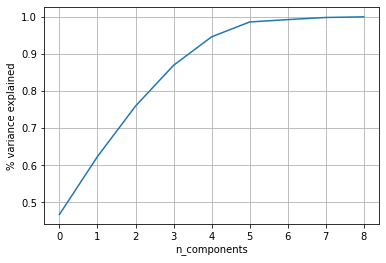

In [ ]:
pca = PCA(n_components = X_train_std.shape[1])
pca_data = pca.fit_transform(X_train_std)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [ ]:
cumm_var_explained

array([0.46763399, 0.62373791, 0.75965333, 0.86948383, 0.94616516,
       0.98619208, 0.99254496, 0.99824694, 1.        ])

In [ ]:
pca.explained_variance_

array([4.20881738, 1.40497249, 1.22327117, 0.98850068, 0.69015024,
       0.36025183, 0.05717744, 0.05131916, 0.01577799])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9861920784453275

In [ ]:
pca = PCA(n_components=6)
pca_train_data = pca.fit_transform(X_train_std)
pca_test_data = pca.transform(X_test_std)

### Correlation after PCA:

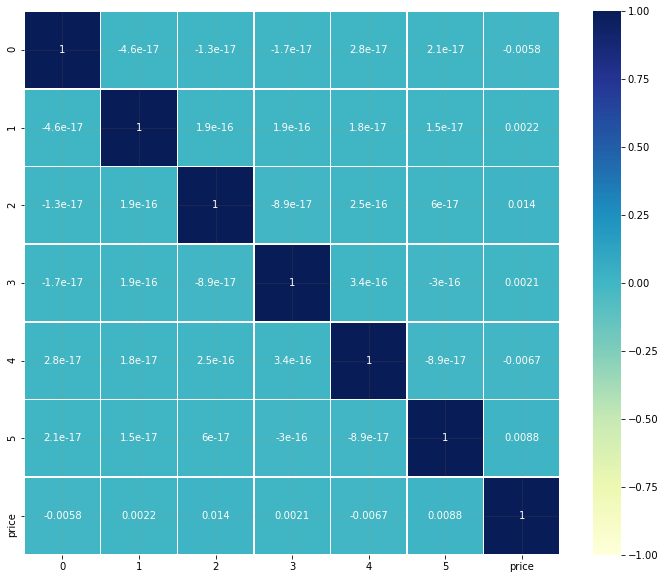

In [ ]:
df_train_pca = pd.DataFrame(pca_train_data)
df_train_pca["price"] = y_train

corr = df_train_pca.corr()
plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()